<a href="https://colab.research.google.com/github/Ericfromtaipei/AI-Scholar-Session-2-Code/blob/main/Code_Walkthrough_Week_2_EDA_%26_Linear_Regression_%5BUpdated_Version%2C_Dash%5D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Machine Learning Simple Regression Analysis: Housing Price Data Set

The most basic building block in machine learning is regression analysis. In this notebook, using python, we'll carry out a linear regression regression procedure.


## Environment Initiation

Let's set up our coding environment.

In [ ]:
import numpy as np  # for numerical operations
import pandas as pd  # for dataset operations
import matplotlib.pyplot as plt # for plotting

#### Ames Housing Dataset
- Each row represents a home in Ames, Iowa. Each column describes a feature of the home.
- Our goal will be to predict the sales prices of homes, based on their features
- Run the code below to download the dataset

In [ ]:
# Download dataset
df = pd.read_csv("http://jse.amstat.org/v19n3/decock/AmesHousing.txt", sep='\t')
df = df[['Year Built','Gr Liv Area','Overall Qual','Neighborhood','Foundation','TotRms AbvGrd','Full Bath', 'Bedroom AbvGr','SalePrice']]
df.columns = ['Year Built','House Area (sqft)','Quality of Build','Neighborhood','Foundation Type','Total Rooms','Bathrooms','Bedrooms','SalePrice']

In [ ]:
# Display firt few rows of dataset
df.head()

,Year Built,House Area (sqft),Quality of Build,Neighborhood,Foundation Type,Total Rooms,Bathrooms,Bedrooms,SalePrice
0,1960,1656,6,NAmes,CBlock,7,1,3,215000
1,1961,896,5,NAmes,CBlock,5,1,2,105000
2,1958,1329,6,NAmes,CBlock,6,1,3,172000
3,1968,2110,7,NAmes,CBlock,8,2,3,244000
4,1997,1629,5,Gilbert,PConc,6,2,3,189900


In [ ]:
# get shape of dataset
df.shape

(2930, 9)

## Exploratory Data Analysis (EDA)

To get a quick numerical summary of our dataset, we can use the `.describe()` pandas function:

In [ ]:
# get numerical summary of dataset
df.describe()

,Year Built,House Area (sqft),Quality of Build,Total Rooms,Bathrooms,Bedrooms,SalePrice
count,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000
mean,1971.356314,1499.690444,6.094881,6.443003,1.566553,2.854266,180796.060068
std,30.245361,505.508887,1.411026,1.572964,0.552941,0.827731,79886.692357
min,1872.000000,334.000000,1.000000,2.000000,0.000000,0.000000,12789.000000
25%,1954.000000,1126.000000,5.000000,5.000000,1.000000,2.000000,129500.000000
50%,1973.000000,1442.000000,6.000000,6.000000,2.000000,3.000000,160000.000000
75%,2001.000000,1742.750000,7.000000,7.000000,2.000000,3.000000,213500.000000
max,2010.000000,5642.000000,10.000000,15.000000,4.000000,8.000000,755000.000000


Histograms are a useful way to look at the quantitative values in our dataset and how they are distributed

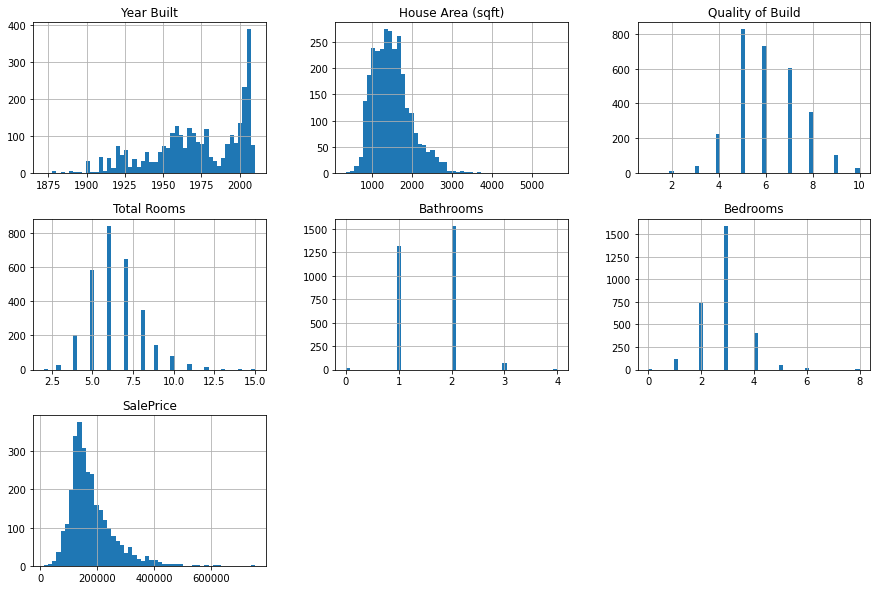

In [ ]:
# histograms of quantitative features
df.hist(bins=50, figsize=(15,10))
plt.show()

Value counts are a good way to look at categorical features in our dataset.

In [ ]:
# value counts for neighborhood
print('Number of homes from each neighborhood')
df['Neighborhood'].value_counts()

Number of homes from each neighborhood


NAmes      443
CollgCr    267
OldTown    239
Edwards    194
Somerst    182
NridgHt    166
Gilbert    165
Sawyer     151
NWAmes     131
SawyerW    125
Mitchel    114
BrkSide    108
Crawfor    103
IDOTRR      93
Timber      72
NoRidge     71
StoneBr     51
SWISU       48
ClearCr     44
MeadowV     37
BrDale      30
Blmngtn     28
Veenker     24
NPkVill     23
Blueste     10
Greens       8
GrnHill      2
Landmrk      1
Name: Neighborhood, dtype: int64

In [ ]:
# value counts for neighborhood
print('Types of foundations (material = cynder block, poured concrete, brick, slab, stone, or wood)')
df['Foundation Type'].value_counts()

Types of foundations (material = cynder block, poured concrete, brick, slab, stone, or wood)


PConc     1310
CBlock    1244
BrkTil     311
Slab        49
Stone       11
Wood         5
Name: Foundation Type, dtype: int64

We can visualize these value counts through barplots

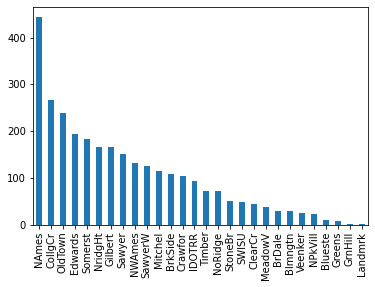

In [ ]:
# Barplot for neighborhood
df['Neighborhood'].value_counts().plot(kind='bar')

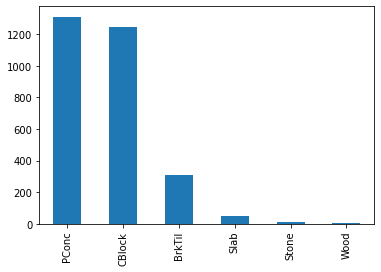

In [ ]:
# Barplot for foundation type
df['Foundation Type'].value_counts().plot(kind='bar')

We can start examining correlations with our target variable (price), to see if any variables might be strong predictors of price. For example, here is a scatterplot between year built and price.

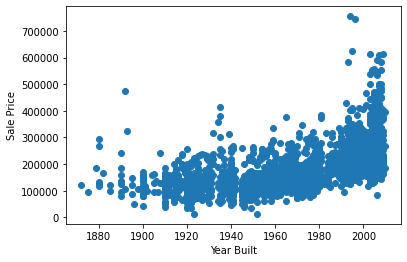

In [ ]:
# scatterplot showing year built and sale price
plt.scatter(df['Year Built'], df['SalePrice'])
plt.xlabel('Year Built')
plt.ylabel('Sale Price')
plt.show()

**Chat Waterfall:** Describe the relationship between year built and sale price. Is it positive of negative? Strong or week? Linear or non-linear?



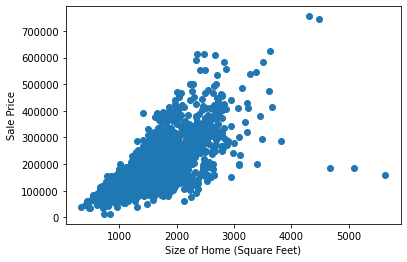

In [ ]:
# scatterplot showing lot size and price
plt.scatter(df['House Area (sqft)'], df['SalePrice'])
plt.xlabel('Size of Home (Square Feet)')
plt.ylabel('Sale Price')
plt.show()

**Chat Waterfall:** Does the relationship between home area and price appear to be stronger or weaker than the relationship between year built and price? How can you tell?

## Simple Linear Regression

Let's now do a simple linear regression, using a home's size to predict its sale price.

In [ ]:
# separate into x and y variables
X = np.array(df['House Area (sqft)']).reshape(-1, 1) #reshaping will help our model fitting
y = np.array(df['SalePrice']).reshape(-1, 1) #reshaping will help our model fitting

In [ ]:
# import linear regression model, from sklearn
from sklearn.linear_model import LinearRegression
lm = LinearRegression() # builds up model package
lm.fit(X, y) # trains model using training x and y

LinearRegression()

The following block will show the fitted linear regression coefficients. Here's a reminder of the formula:

$$y = \beta_0 + \beta_1 x + \epsilon$$

In [ ]:
# shows fitted coefficients
print('Intercept: ', lm.intercept_)
print('Slope: ',lm.coef_)

Intercept:  [13289.63436476]
Slope:  [[111.69400086]]


**Volunteer:** Interpret what each ceofficient value means, in the context of this problem.

<br>

Let's graph our model on top of our data:

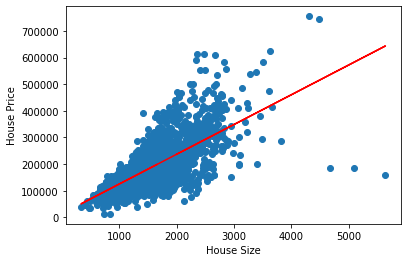

In [ ]:
plt.scatter(X, y)
plt.plot(X, lm.predict(X), 'r')
plt.xlabel('House Size')
plt.ylabel('House Price')
plt.show()

To evaluate our model fit and predictions, we can determine the mean squared error (MSE):

In [ ]:
from sklearn.metrics import mean_squared_error
simple_model_MSE = mean_squared_error(y,lm.predict(X))
simple_model_MSE

3192801087.3860455

## Train/Test Split and Multiple Linear Regression

Now, we're going to do some real machine learning. We're going to split our data into train and test sets. Then, we'll fit our model on the train data, testing its accuracy (MSE) on the test data. This will give us a sense of how accurate our model's predictions would be on new data.

For this task, we'll use multiple linear regression (linear regression, with multiple predictor variables). Our goal will be to use the homes' features (X) to predict their sales price (y). So, let's separate the sales price from the rest of the features:

In [ ]:
# Get X data (all data except target of price and categorical variables)
# Note: In a later lesson, we'll discuss how to to handle categorical features
X = df.drop(['Neighborhood','Foundation Type','SalePrice'], axis = 1)
y = df['SalePrice']

Now, let's split our data into train and test sets.

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
# Randomly split into train and test sets (30% of data in test set)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# Reshape data for model fitting
X_train = np.array(X_train)
y_train = np.array(y_train).reshape(-1, 1)
X_test = np.array(X_test)
y_test = np.array(y_test).reshape(-1,1)

print(X_train.shape, X_test.shape)

(2051, 6) (879, 6)


We'll now fit our multiple linear regression model:

$$y = \beta_0 + \beta_1 x_1+ \beta_2 x_2+ \beta_3 x_3+ \beta_4 x_4 +... + \epsilon$$

We'll use all the home features available to us (home area, number of bedrooms, build quality, etc.) in our dataset.

In [ ]:
# fit on training data
lm = LinearRegression() # builds up model package
lm.fit(X_train, y_train) # trains model using training x and y

LinearRegression()

**Chat Waterfall:** It appears that `Total Rooms` has a negative coefficient value. Why might this be?

In [ ]:
lm.coef_

array([[   513.42827714,     74.44570568,  24698.52331147,
          2900.85988925,  -7516.33971361, -13937.84116863]])

Let's make predictions on our test set and get our test MSE.

In [ ]:
multiple_regression_MSE = mean_squared_error(y_test, lm.predict(X_test))
multiple_regression_MSE

1705802765.4025605

How much better is this multiple regression model than our simple linear regresison model? Let's compare the MSE values! We're going to divide the simple linear regression MSE by the multiple regression MSE:

In [ ]:
simple_model_MSE / multiple_regression_MSE

1.8717293418342895

The multiple regression reduced the MSE by a factor of almost 2!

# Practice Problems Start Here

Load libraries. The librarires required are
- numpy
- pandas
- import matplotlib.pyplot as plt

In [ ]:
# do not edit this code
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

We use *California Housing Data*, which can be referenced from [here](https://scikit-learn.org/stable/datasets/real_world.html#california-housing-dataset). More info can be found [here](https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html).

We collected information on the variables using all the block groups in California from the 1990 Cens us. In this sample a block group on average includes 1425.5 individuals living in a geographically compact area. Naturally, the geographical area included varies inversely with the population density. W e computed distances among the centroids of each block group as measured in latitude and longitude. We excluded all the block groups reporting zero entries for the independent and dependent variables. T he final data contained 20,640 observations on 9 variables. The dependent variable is ln(median house value).

In [ ]:
# load sklearn library
# do not edit this code
# but you have to run it
from sklearn.datasets import fetch_california_housing

path = "/content/sample_data/california_housing_train.csv" # paste the path here
df = pd.read_csv(path)

### Warm-up & Review: Using Pandas

In the warm-up & review problems, we are going to do some practice of using Pandas. If you feel comfortable with Pandas, you can skip ahead to get into Linear Regression. For everyone else. We encourage you to do these problesm first. If you need help, check out the [coding walk through of Pandas & Numby.](https://drive.google.com/file/d/1E0m-dSdBhymbkplUDIUD-nLQ_hmJRHBh/view?usp=sharing).

### Warm-up (1): Exploring the dataframe

Let's start off by just looking at the dataframe above that we have defined. As a first step, please look at the head of the dataset. Remember you can do that using the df.head() function (really the function is .head and this is being called on the panda dataframe that we have named df.) Try it below!

In [ ]:
# Look at the head of the dataframe using the .head function
## Your Code Starts Here ##


### Warm-up (2): Find the largest and smallest median housing price in the dataset

Great! You've looked at the dataset and you can probably see that there are a bunch of different columns. One of the columns that you'll see is the variable `median_house_value`.

Below, find the max housing price for a district and the minimum housing price for a district.

HINT: Use numpy functions for max and min once you select the "target" variable from the dataframe.

In [ ]:
## Your Code Starts Here ##


### Warm-up (3): Exploring the dataframe

We have introduced the *.describe* method in the pandas library. In this warm-up exercise, you will use *.describe* method to display the summary statistics of each column in the dataframe.

In [ ]:
## Your Code Starts Here ##


### Task (1): Define X and Y of Linear Model

Great! You've begun to understand a bit more about your data. Now we're actually going to build a machine learning model to predict the median house price in each of these census tracts.

Please define explanatory variable "median income" as $X$ and the response variable "median house value" as $Y$.

Hint: Use the pandas library to locate a column inside a pandas dataframe.

In [ ]:
## Your Code Starts Here ##


### Task (2): Exploring Data

We explore the scatter plot of *X* and *Y*. Please do a scatter plot by using $X$ anad $Y$ defined above.

- Hint: you may find *plt.scatter()* helpful.
- Please also define X-label and Y-label names. You may find the *plt.xlabel()* and *plt.ylabel()* helpful.

Text(0, 0.5, 'Target')

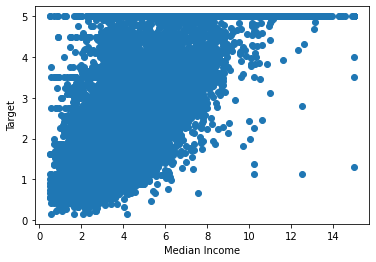

In [ ]:
## Your Code Starts Here ##


We use the following section to fit a linear regression model. These data processing part are required. However, you do not have to complete these. We leave them here for your reference in case you are interested.

In [ ]:
# do not edit this code
from sklearn.model_selection import train_test_split

In [ ]:
# do not edit this code
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=0)
X_train = np.array(X_train).reshape(-1, 1)
y_train = np.array(y_train).reshape(-1, 1)
X_test = np.array(X_test).reshape(-1, 1)
y_test = np.array(y_test).reshape(-1, 1)
print(X_train.shape, X_test.shape)

(14448, 1) (6192, 1)


### Task (3): Linear Regression Model

Fit a linear regression model using X_train and y_train. Hint: you may find the function *LinearRegression()* in our practice walk-through during Session 2 helpful.

In [ ]:
# do not edit this code
from sklearn.linear_model import LinearRegression

In [ ]:
## Your Code Starts Here ##


### Task (4): Print the coefficients

Please print the coefficients of the model and use plain English to interpret what the coefficient means.

In [ ]:
## Your Code Starts Here ##


### Task (5): See how good your predictions are

Find the MSE on the test set.

In [ ]:
## Your Code Starts Here ##


## **Small Group Discussion Question**

You should have found a positive slope in your linear regression model. Why was the slope positive? Hint: Think about how incomes might relate to home values.

## Challenge Problems

### Challenge (1): Multiple Regression

This time, include ALL features as (X). The median home price will still be the target (y). Do a train test split, fit a multiple linear regression model, and find your test MSE on the test set.

In [ ]:
## Your Code Starts Here ##


### Challenge (2): Generate Predictors

Use the *YOUR_MODEL.predict()* method to predict educated guesses or estimate using model and data.

Please compute predictions using training set *X_train*.

In [ ]:
## Your Code Starts Here ##


Please compute predictor using test set *X_test*.

In [ ]:
## Your Code Starts Here ##


### Challenge (3): Calculate Root Means Squared Erro by Hand

Recall that we have discussed in class Mean Square Error or MSE. This is a loss function that measures how many mistakes the educated guess is making at predicting the ground truth. Before we do the computations, let us introduce the notation

- $\frac{1}{n}$: this means divide by $n$ while $N$ is the total sample size of the training or test set.
- $\sum_{i=1}^n$: this is the summation symbol, it means take sum using running index from $i=1$ to $i=n$.
- $Y_i$: this is the ground truth, i.e. the real number of housing price
- $\hat{Y}_i$: this is the educated guess or the output of the model, i.e. you can find this using the function *YOUR_MODEL.predict()*.


$$\text{MSE} = \frac{1}{n} \sum_{i=1}^n (Y_i - \hat{Y}_i)^2$$

Note that the outcome of this error is a little difficult to interpret. This reason is because the unit of this error is in square terms. For example, if $Y$ is housing price in dollars and $\hat{Y}$ is also in dollars, then MSE would be dollar$^2$. This is difficult to interpret in real world.

To take care of this problem, we take a square root of the MSE formula. We call it the Root MSE or RMSE.

$$\text{RMSE} = \sqrt{\frac{1}{n} \sum_{i=1}^n (Y_i - \hat{Y}_i)^2}$$


**Task**: Without using the sklearn `mean_squared_error` function, write your own code to calculate the root mean squared error on the test set. Hint: You may find the `.mean()` method and `**` operator helpful in this exercise.

In [ ]:
## Your Code Starts Here ##
